In [1]:
import numpy as np
from scipy.integrate import quad, solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [4]:
a = 0.5
b = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0, t_f = 0, 25

In [3]:
def func_s(t, S):
    return (-(a * S))

In [6]:
solution_s = solve_ivp(func_s, (t_0, t_f), [S_0], dense_output=True)
print(solution_s)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.149e-01 ...  2.415e+01  2.500e+01]
        y: [[ 9.900e+05  9.347e+05 ...  5.677e+00  3.713e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f31c1a01d30>
 t_events: None
 y_events: None
     nfev: 98
     njev: 0
      nlu: 0


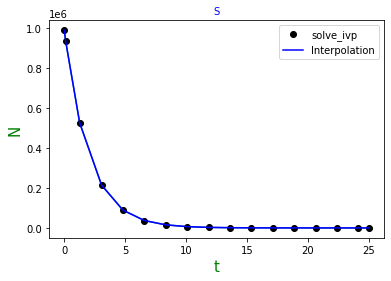

In [8]:
t_dsdt, y_dsdt = solution_s.t, solution_s.y[0]

plt.plot(t_dsdt, y_dsdt)
z_dsdt, = solution_s.sol(t_dsdt)
plt.plot(t_dsdt, y_dsdt, 'o', color='k', label='solve_ivp')

plt.plot(t_dsdt, z_dsdt, color='blue', label='Interpolation')
plt.title('S', fontsize=10, color='blue')
plt.xlabel('t', fontsize=15, color="g") 
plt.ylabel('N', fontsize=15, color="g") 
plt.legend()

plt.show()

In [11]:
def dIdt(t, I):
    return ((a * solution_s.sol(t)) - (b * I))

In [14]:
solution_i = solve_ivp(dIdt, (t_0, t_f), [I_0], dense_output=True)
print(solution_i)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.420e-02 ...  2.360e+01  2.500e+01]
        y: [[ 7.000e+03  1.396e+04 ...  2.075e+03  1.368e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f31bec7cdc0>
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0


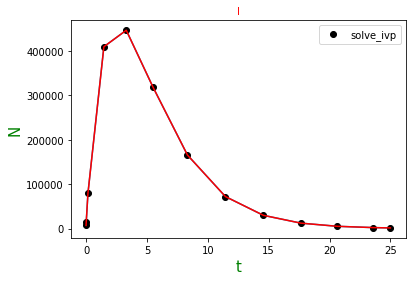

In [20]:
t_didt, y_didt = solution_i.t, solution_i.y[0]

plt.plot(t_didt, y_didt)
z_didt, = solution_i.sol(t_didt)
plt.plot(t_didt, y_didt, 'o', color='k', label='solve_ivp')
plt.plot(t_didt, z_didt, color='red')
plt.title('I', fontsize=10, color='red')
plt.xlabel('t', fontsize=15, color="g") 
plt.ylabel('N', fontsize=15, color="g") 
plt.legend()
plt.show()

In [17]:
R_0 = N - solution_s.sol(solution_i.t)[0] - solution_i.y[0]
interp_r = interp1d(solution_i.t, R_0, kind='linear')

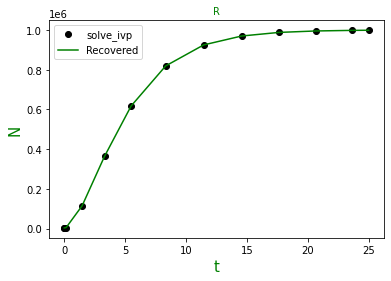

In [21]:
plt.plot(solution_i.t, R_0, 'o', color='k', label='solve_ivp')
plt.plot(solution_i.t, interp_r(solution_i.t), color='green', label='Recovered')

plt.title('R', fontsize=10, color='green')
plt.xlabel('t', fontsize=15, color='g')
plt.ylabel('N', fontsize=15, color='g') 
plt.legend()
plt.show()

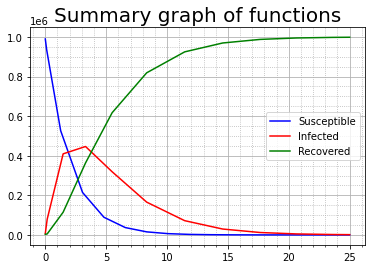

In [22]:
plt.plot(t_dsdt, y_dsdt, color='blue', label='Susceptible')
plt.plot(t_didt, y_didt, color='red', label='Infected')
plt.plot(solution_i.t, R_0, color='green', label='Recovered')

plt.title('Summary graph of functions', fontsize=20, color='k')
plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');
plt.show()